In [109]:

import pandas as pd
import numpy as np
import calendar
from time import strptime
from datetime import datetime

from matplotlib import pyplot as plt

In [3]:
df= pd.read_csv("crime.csv")
df['semi_year'] = df['REPORTED_DATE'].map(lambda x: x)
df['REPORTED_DATE'] = pd.to_datetime(df['REPORTED_DATE'])
df['year'] = df['REPORTED_DATE'].map(lambda x: str(x.year) +'A' if x.month < 7 else str(x.year) +"B")

OFFENSE_CATEGORY_ID,year,aggravated-assault,all-other-crimes,arson,auto-theft,burglary,drug-alcohol,larceny,murder,other-crimes-against-persons,public-disorder,robbery,sexual-assault,theft-from-motor-vehicle,traffic-accident,white-collar-crime
0,2013A,752,2593,42,1530,2118,1487,3337,20,1029,3295,464,225,3100,8848,316
1,2013B,858,6636,50,1681,2370,2985,4441,21,1786,4598,547,228,2808,9827,364
2,2014A,857,7531,73,1644,2216,2928,4323,13,1875,4962,480,246,2278,10094,511
3,2014B,916,7876,59,1821,2301,3097,4926,19,2209,4979,588,311,2778,11519,505
4,2015A,930,7960,54,2010,2213,3125,4163,24,2110,4813,548,359,2869,11204,760
5,2015B,1077,7770,54,2472,2649,3061,4681,34,2300,4970,665,343,3394,12096,548
6,2016A,980,8526,41,2311,2367,3203,4443,15,2321,5158,569,320,3220,11444,663
7,2016B,1164,7934,53,2508,2322,2878,4699,39,2317,4760,585,393,3333,12291,561
8,2017A,1025,9047,60,2396,2146,2842,4202,27,2336,4755,541,439,3605,11722,668
9,2017B,1075,8182,64,3166,2307,2825,4766,33,2418,4591,665,416,3722,12519,639


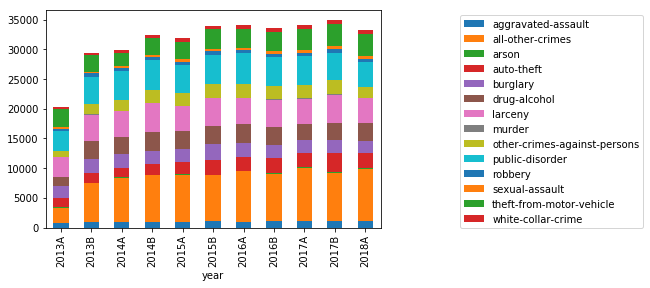

In [4]:
df_no_traffic= df[df['IS_TRAFFIC'] == 0]

df_no_traffic= df.groupby(['year','OFFENSE_CATEGORY_ID'])['year'].count().unstack("OFFENSE_CATEGORY_ID")

crime_catergoies_plot = df_no_traffic[['aggravated-assault', 'all-other-crimes', 'arson', 'auto-theft',
      'burglary', 'drug-alcohol', 'larceny', 'murder',
        'other-crimes-against-persons', 'public-disorder', 'robbery',
       'sexual-assault', 'theft-from-motor-vehicle',
       'white-collar-crime']].plot(kind='bar', stacked=True);

crime_catergoies_plot.legend(loc='upper right', bbox_to_anchor=(1.8, 1));
df_crime_semi_year = df_no_traffic.reset_index()
df_crime_semi_year

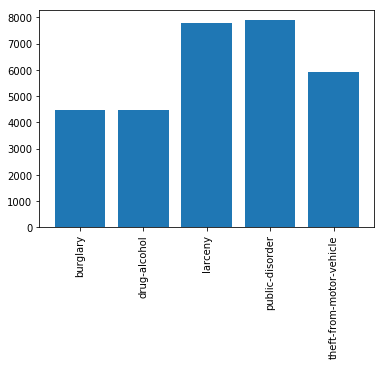

In [146]:
df_Cate_2013 = df[df['IS_TRAFFIC'] == 0]
df_Cate_2013 = df_Cate_2013[df_Cate_2013['OFFENSE_CATEGORY_ID'] !='all-other-crimes']
Filter_Year = df_Cate_2013['Year'] == 2013
df_Cate_2013 = df_Cate_2013[Filter_Year]
df_Cate_2013 = df_Cate_2013.groupby(['Year','OFFENSE_CATEGORY_ID']).count().reset_index()
df_Cate_2013 = df_Cate_2013[['Year','OFFENSE_CATEGORY_ID', 'INCIDENT_ID']]
df_Cate_2013 = df_Cate_2013.sort_values(by='INCIDENT_ID', ascending=False)
df_Cate_2013 = df_Cate_2013[:5]

# print(df_Cate_2013)
# plot_2013=df_Cate_2013[['OFFENSE_CATEGORY_ID', 'INCIDENT_ID']].plot(kind='bar');

plot_13=plt.bar(df_Cate_2013['OFFENSE_CATEGORY_ID'],df_Cate_2013['INCIDENT_ID']) 
plot_13= plt.xticks(rotation = 90)
plot_13t=plt.show()

#.plot(kind='bar', stacked=True);

In [134]:
df_Cate_2013 = df[df['IS_TRAFFIC'] == 0]
df_Cate_2013 = df_Cate_2013[df_Cate_2013['OFFENSE_CATEGORY_ID'] !='all-other-crimes']
Filter_Year = df_Cate_2013['Year'] == 2013
df_Cate_2013 = df_Cate_2013[Filter_Year]
df_Cate_2013 = df_Cate_2013.groupby(['Year','OFFENSE_CATEGORY_ID']).count().reset_index()
df_Cate_2013 = df_Cate_2013[['Year','OFFENSE_CATEGORY_ID', 'INCIDENT_ID']]
df_Cate_2013 = df_Cate_2013.sort_values(by='INCIDENT_ID', ascending=False)
df_Cate_2013 = df_Cate_2013[:5]

df_Cate_2014 = df[df['IS_TRAFFIC'] == 0]
df_Cate_2014 = df_Cate_2014[df_Cate_2014['OFFENSE_CATEGORY_ID'] !='all-other-crimes']
Filter_Year = df_Cate_2014['Year'] == 2014
df_Cate_2014 = df_Cate_2014[Filter_Year]
df_Cate_2014 = df_Cate_2014.groupby(['Year','OFFENSE_CATEGORY_ID']).count().reset_index()
df_Cate_2014 = df_Cate_2014[['Year','OFFENSE_CATEGORY_ID', 'INCIDENT_ID']]
df_Cate_2014 = df_Cate_2014.sort_values(by='INCIDENT_ID', ascending=False)
df_Cate_2014 = df_Cate_2014[:5]


df_Cate_2015 = df[df['IS_TRAFFIC'] == 0]
df_Cate_2015 = df_Cate_2015[df_Cate_2015['OFFENSE_CATEGORY_ID'] !='all-other-crimes']
Filter_Year = df_Cate_2015['Year'] == 2015
df_Cate_2015 = df_Cate_2015[Filter_Year]
df_Cate_2015 = df_Cate_2015.groupby(['Year','OFFENSE_CATEGORY_ID']).count().reset_index()
df_Cate_2015 = df_Cate_2015[['Year','OFFENSE_CATEGORY_ID', 'INCIDENT_ID']]
df_Cate_2015 = df_Cate_2015.sort_values(by='INCIDENT_ID', ascending=False)
df_Cate_2015 = df_Cate_2015[:5]


df_Cate_2016 = df[df['IS_TRAFFIC'] == 0]
df_Cate_2016 = df_Cate_2016[df_Cate_2016['OFFENSE_CATEGORY_ID'] !='all-other-crimes']
Filter_Year = df_Cate_2016['Year'] == 2016
df_Cate_2016 = df_Cate_2016[Filter_Year]
df_Cate_2016 = df_Cate_2016.groupby(['Year','OFFENSE_CATEGORY_ID']).count().reset_index()
df_Cate_2016 = df_Cate_2016[['Year','OFFENSE_CATEGORY_ID', 'INCIDENT_ID']]
df_Cate_2016 = df_Cate_2016.sort_values(by='INCIDENT_ID', ascending=False)
df_Cate_2016 = df_Cate_2016[:5]

df_Cate_2017 = df[df['IS_TRAFFIC'] == 0]
df_Cate_2017 = df_Cate_2017[df_Cate_2017['OFFENSE_CATEGORY_ID'] !='all-other-crimes']
Filter_Year = df_Cate_2017['Year'] == 2017
df_Cate_2017 = df_Cate_2017[Filter_Year]
df_Cate_2017 = df_Cate_2017.groupby(['Year','OFFENSE_CATEGORY_ID']).count().reset_index()
df_Cate_2017 = df_Cate_2017[['Year','OFFENSE_CATEGORY_ID', 'INCIDENT_ID']]
df_Cate_2017 = df_Cate_2017.sort_values(by='INCIDENT_ID', ascending=False)
df_Cate_2017 = df_Cate_2017[:5]


df_Cate_2018 = df[df['IS_TRAFFIC'] == 0]
df_Cate_2018 = df_Cate_2018[df_Cate_2018['OFFENSE_CATEGORY_ID'] !='all-other-crimes']
Filter_Year = df_Cate_2018['Year'] == 2018
df_Cate_2018 = df_Cate_2018[Filter_Year]
df_Cate_2018 = df_Cate_2018.groupby(['Year','OFFENSE_CATEGORY_ID']).count().reset_index()
df_Cate_2018 = df_Cate_2018[['Year','OFFENSE_CATEGORY_ID', 'INCIDENT_ID']]
df_Cate_2018 = df_Cate_2018.sort_values(by='INCIDENT_ID', ascending=False)
df_Cate_2018 = df_Cate_2018[:5]

df_Cate_2018


fig, axes = plt.subplots(4, 3);

for ax in axes.flatten():
    ax.plot(nums, np.sin(nums))

,Year,OFFENSE_CATEGORY_ID,INCIDENT_ID
5,2018,larceny,4262
8,2018,public-disorder,4160
11,2018,theft-from-motor-vehicle,3809
4,2018,drug-alcohol,3010
2,2018,auto-theft,2543


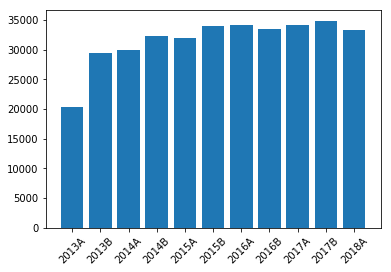

In [74]:
df2= df[df['IS_TRAFFIC'] == 0]

df_crime_count = df2.groupby("year")['INCIDENT_ID'].count().reset_index()
year_col = df_crime_count['year']
id_col= df_crime_count['INCIDENT_ID']
crime_count_plot=plt.bar(year_col,id_col) 
crime_count_plot= plt.xticks(rotation = 45)
crime_count_plot=plt.show()

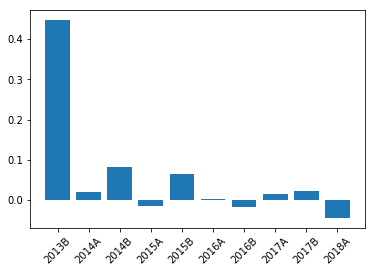

In [7]:
pct_change = df_crime_count.copy()
pct_change['% Change']= pct_change['INCIDENT_ID'].pct_change()
pct_change.head()

plt.bar(pct_change['year'],pct_change['% Change'] );

plt.xticks(rotation = 45);

C:\Users\thiag\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


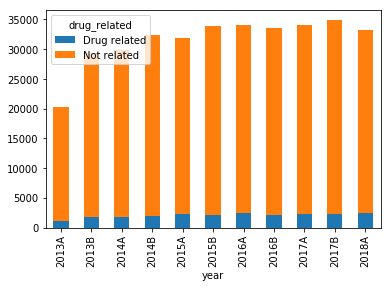

In [8]:
df_no_traffic= df[df['IS_TRAFFIC'] == 0]

df_no_traffic["drug_related"] = df_no_traffic['OFFENSE_TYPE_ID'].map(lambda x: "Drug related" if "drug" in x else "Not related")
df_drug_related = df_no_traffic.groupby(['year', 'drug_related'])['year'].count().unstack('drug_related').fillna(0)
df_drug_related[['Drug related','Not related']].plot(kind='bar', stacked=True);



C:\Users\thiag\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


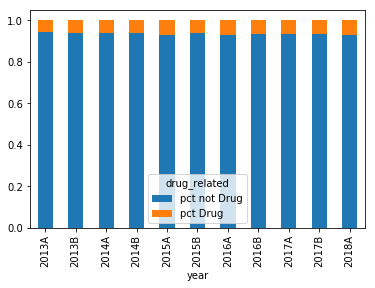

In [9]:

df_no_traffic= df[df['IS_TRAFFIC'] == 0]

df_no_traffic["drug_related"] = df_no_traffic['OFFENSE_TYPE_ID'].map(lambda x: "Drug related" if "drug" in x else "Not related")
df_drug_related = df_no_traffic.groupby(['year', 'drug_related'])['year'].count().unstack('drug_related').fillna(0)

df_drug_related["Total"] = df_drug_related['Drug related'] + df_drug_related['Not related']

df_drug_related['pct Drug'] = df_drug_related['Drug related'] / df_drug_related["Total"]
df_drug_related['pct not Drug'] = df_drug_related['Not related'] / df_drug_related["Total"]

#df_drug_related = df_drug_related[]
# no_drug=df_drug_related['Not related']
# Prct_drug_related=('drug'/(drug['drug']+drug['no_drug']))

# df_drug_related['Prct_drug_related']

df_drug_related[['pct not Drug','pct Drug']].plot(kind='bar', stacked=True);




In [10]:
Denver_Population= pd.read_csv("citypopulation.csv")
Denver_Population

,Year,Population,Growth,Growth Rate
0,2012,"633,798","14,442",NaN
1,2013,"648,049","14,251",0.00
2,2014,"663,271","15,222",2.35
3,2015,"681,618","18,347",2.77
4,2016,"694,777","13,159",1.93
5,2017,"704,621","9,844",1.42


In [11]:
df_no_traffic_2 = df_no_traffic.groupby('Year')['INCIDENT_ID'].count().reset_index()
df_no_traffic_2

,Year,INCIDENT_ID
0,2013,49648
1,2014,62291
2,2015,65900
3,2016,67632
4,2017,68904
5,2018,33297


In [133]:
df_population_x_crime = pd.merge(Denver_Population,df_no_traffic_2, how="inner", on='Year')
df_population_x_crime.rename(columns={"INCIDENT_ID":"Number of crimes"}, inplace=True)
df_population_x_crime['% Change - Crimes']= round(df_population_x_crime['Number of crimes'].pct_change()*100,1)
df_population_x_crime.iloc[0,5] = 0
df_population_x_crime 


,Year,Population,Growth,Growth Rate,Number of crimes,% Change - Crimes
0,2013,"648,049","14,251",0.00,49648,0.0
1,2014,"663,271","15,222",2.35,62291,25.5
2,2015,"681,618","18,347",2.77,65900,5.8
3,2016,"694,777","13,159",1.93,67632,2.6
4,2017,"704,621","9,844",1.42,68904,1.9


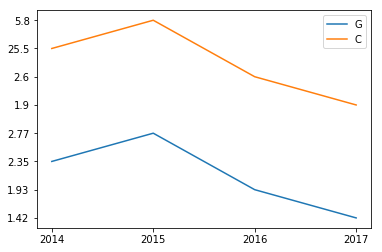

In [132]:
d = ['2014','2015','2016','2017']
t2 = ['2.35', '2.77','1.93','1.42']
t1 = ['25.5','5.8','2.6','1.9']

plt.plot(d, t2)
plt.plot(d, t1)
# plt.grid(True,linewidth=0.2,color='#aaaaaa',linestyle='-')
# plt.title("Growth rate x Crime Rate", size=10, fontweight='bold')
# #plt.legend(legend((t2, t1), ('label1', 'label2'))
plt.legend("GC")
# plt.show()

In [76]:
df2["marijuana"] = df2['OFFENSE_TYPE_ID'].map(lambda x: "Drug related" if "drug" in x else "Not related")
df2["marijuana"] = df2['OFFENSE_TYPE_ID'].map(lambda x: "Marijuana" if "marijuana" in x else "Other")
df_marijuana = df2.groupby(['year', 'marijuana'])['year'].count().unstack('marijuana').fillna(0)
# df_marijuana
df_marijuana

#df2.head = df2.head[df2.head['marijuana']=='Marijuana']

C:\Users\thiag\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\thiag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


marijuana,Marijuana,Other
year,,
2013A,109,20185
2013B,338,29016
2014A,316,29609
2014B,425,31941
2015A,598,31322
2015B,401,33579
2016A,427,33680
2016B,146,33379
2017A,140,33928


In [80]:
df2["marijuana"] = df2['OFFENSE_TYPE_ID'].map(lambda x: "Drug related" if "drug" in x else "Not related")
df2["Opium"] = df2['OFFENSE_TYPE_ID'].map(lambda x: "Opium" if "opium" in x else "Other")
df_Opium = df2.groupby(['year', 'Opium'])['year'].count().unstack('Opium').fillna(0).reset_index()
# df_marijuana
df_Opium

C:\Users\thiag\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\thiag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Opium,year,Opium,Other
0,2013A,11,20283
1,2013B,18,29336
2,2014A,24,29901
3,2014B,16,32350
4,2015A,8,31912
5,2015B,23,33957
6,2016A,12,34095
7,2016B,19,33506
8,2017A,18,34050
9,2017B,13,34823


,Year,INCIDENT_ID
0,2013,49648
1,2014,62291
2,2015,65900
3,2016,67632
4,2017,68904
5,2018,33297


In [128]:
df_population_x_crime['Growth Rate'][1:]

1    2.35
2    2.77
3    1.93
4    1.42
Name: Growth Rate, dtype: float64